In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
tree = DecisionTreeClassifier(max_depth=1).fit(X, y)
tree.tree_.__getstate__()["nodes"]

array([( 1,  2,  9,  3.80603087, 0.5       , 200, 200., 0),
       (-1, -1, -2, -2.        , 0.        ,  92,  92., 0),
       (-1, -1, -2, -2.        , 0.13717421, 108, 108., 0)],
      dtype={'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64})

In [73]:
from tree import Tree
import numpy as np

tree = Tree()
X = np.concat([np.random.normal(0, 4, (100, 15)), np.random.uniform(10, 4, (100, 15))])
y = np.concat([np.zeros((100)), np.ones((100))])
print(X.shape)
tree.fit(X, y)

(200, 15)


In [52]:
tree.predict(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [59]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import your Tree class here (the one you provided)
# from your_tree_module import Tree  # Uncomment this line if the Tree class is in a separate module

# Load the Iris dataset and convert it to a binary classification problem
data = load_iris()
X = data.data
y = data.target

# Select only two classes (class 0 and class 1)
X = X[y != 0]  # Only take the samples from class 0 and class 1
y = y[y != 0]  # Only take the labels for class 0 and class 1

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Tree and fit it
tree = Tree(impurity="entropy")
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree on the test set: {accuracy:.4f}")


Accuracy of the Decision Tree on the test set: 0.9500


Accuracy of the Decision Tree on the test set: 0.8867


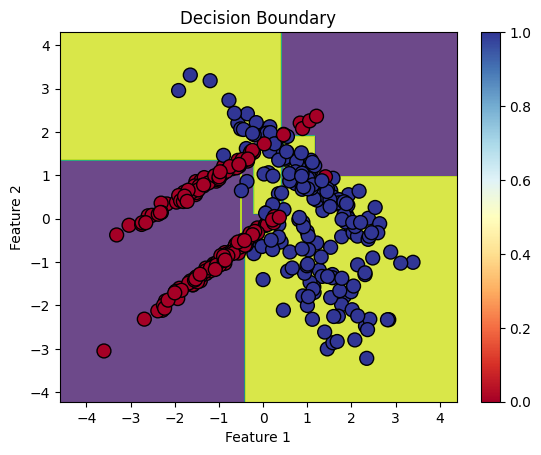

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import your Tree class here (the one you provided)
# from your_tree_module import Tree  # Uncomment this line if the Tree class is in a separate module

# Create a synthetic non-separable dataset (2 features, 2 classes)
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                            n_redundant=0, n_classes=2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Tree and fit it
tree = Tree(impurity="entropy")
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree on the test set: {accuracy:.4f}")

# Plot the decision boundary
def plot_decision_boundary(X, y, model, plot_title="Decision Boundary"):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a meshgrid for plotting the decision boundaries
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Flatten the grid to pass it to the model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Reshape the predictions to the shape of the grid
    Z = Z.reshape(xx.shape)

    # Plot the contour and the training points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu, s=100)
    plt.title(plot_title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

# Plot decision boundaries using the first two features for simplicity
plot_decision_boundary(X_train, y_train, tree)
